In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import os

Populating the interactive namespace from numpy and matplotlib


/home/jngaravito57/Documents/codes/ipython/IPython/kernel/__init__.py:10: UserWarning: The `IPython.kernel` package has been deprecated. You should import from ipython_kernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated. "


In [15]:
data = loadtxt("../../data/Illustris/Illustris_group_25.dat")
!head ../../data/Illustris/Illustris_group_25.dat
x = data[:,1]
y = data[:,2]
z = data[:,3]
Mag = data[:,8]
index = np.where(Mag>100)
index = index[0]
index1 = np.where(Mag<100)
index1 = index1[0]
x_dm = x[index]
y_dm = y[index]
z_dm = z[index]
x_st = x[index1]
y_st = y[index1]
z_st = z[index1]
print "-------------------------------------------"
print "DM particles = ", len(x_dm)
print "St particles = ", len(x_st)
print "-------------------------------------------"

#subID	 x	 y	 z	 vx	 yv	 yz	 vmax	 B_MAG
#subID	 kpc/h	 kpc/h	 kpc/h	 km/s	 km/s	 km/s	 km/s	 mags
432874 17892.660156 56341.597656 4117.939941 -81.668755 159.745895 -286.518799 186.182205 -2.062550e+01
432875 18003.259766 56221.464844 4294.405762 -76.601318 128.944748 -357.753815 70.552277 -1.709673e+01
432876 17865.181641 56311.878906 4200.508789 11.396031 89.062599 -321.585083 75.046448 -1.692069e+01
432877 17861.822266 56384.839844 4102.079102 -10.054641 -25.222092 -139.993011 52.064003 -1.435695e+01
432878 17782.201172 56435.453125 4215.220215 -30.089460 313.447876 -252.482391 29.754910 1.000000e+37
432879 18020.146484 56324.535156 4348.036621 -4.231861 78.735687 -359.461639 25.184153 1.000000e+37
432880 17993.142578 56448.593750 4120.507324 -117.848152 274.490234 -403.633270 21.452751 1.000000e+37
432881 17995.542969 56477.769531 3986.939209 -126.402306 210.062500 -390.632446 20.369646 1.000000e+37
-------------------------------------------
DM particles =  683
St particles =  42

725


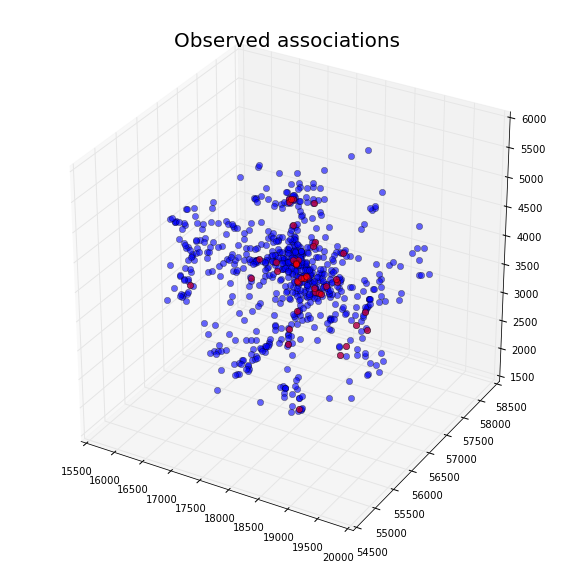

In [18]:
print len(x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
title("Observed associations", fontsize=20)
plot(x, y, z, ls='*', marker='o', alpha=0.6)
plot(x_st, y_st, z_st, ls='*', marker='o', alpha=0.6, c='r')

In [21]:
f = open("Illustris-associtations.dat", "w")
f.write("%d\n"%725) #points in total 
f.write("%d\n"%683) #points in 'DM'
f.write("0\n") #gas
f.write("%d\n"%42) #stars
f.write("0.01\n") # time
f.write("0\n") # nactive
for i in range(len(x)):
    f.write(("%f \t %f \t %f  \n")%(x[i], y[i], z[i]))
f.close()


In [27]:
os.system(('./../../../HackFOF/src/fof -e %f -m 2 < Illustris-associtations.dat')%(600*0.7)) # check this linking length
fof_groups = loadtxt('fof.grp', skiprows=1)
print "Associations found = ", len(list(set(fof_groups)))

Associations found =  12


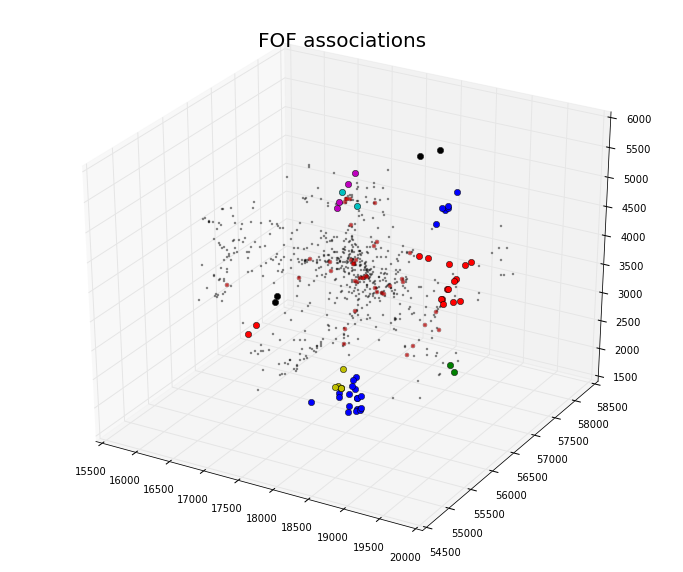

In [51]:
id_a = loadtxt("fof.grp", skiprows=1)
c = ["r", "b", "g", "y", "k", "c", "m", "r", "b", "k", "b", "y"]
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
title("FOF associations", fontsize=20)

plot(x, y, z, ls='*', marker='o', ms=2, c='k', alpha=0.4)
plot(x_st, y_st, z_st, ls='*', marker='o',  c='r', alpha=0.5, ms=4)
for i in range(2,13):
    index = where(id_a==i)
    index = index[0]
    x_a = x[index]
    y_a = y[index]
    z_a = z[index]
    plot(x_a, y_a, z_a, c=c[i-2],  ls='*', marker='o')
